In [1]:
import glob
import pdb
import os
import heapq
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from scipy.spatial import distance

from computeMHI import computeMHI
from generateAllMHIs import generateAllMHIs
from huMoments import huMoments
from generateAllHuMoments import generateAllHuMoments
from predictAction import predictAction
from showNearestMHIs import showNearestMHIs
from utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def norm_dists(train_examples, train_idxs, test_example):
    
    dists = []
    variances = np.std(train_examples, axis=0)**2

    for train_example, train_idx in zip(train_examples, train_idxs):
        #dists.append(normalized_euclidean_distance(train_example.reshape(1, -1), test_example, variances))
        if len(dists) < 4:
            heapq.heappush(dists, (normalized_euclidean_distance(train_example.reshape(1, -1), test_example, variances), train_idx))
        else:
            heapq.heappushpop(dists, (normalized_euclidean_distance(train_example.reshape(1, -1), test_example, variances), train_idx))

    #     if dist < min_dist:
    #         min_dist = dist
    #         label_idx = i
    #dists = np.array(dists)
    return dists

In [22]:
base_dir = 'PS5_Data'
actions = ['botharms', 'crouch', 'leftarmup', 'punch', 'rightkick']
threshold = 39000

#mhis = generateAllMHIs(threshold=45000, save=True)
mhis = np.load('allMHIs.npy')

#hu_moments = generateAllHuMoments(save=True)
hu_moments = np.load('allHuMoments.npy')

#norm_hu_moments = hu_moments / np.max(hu_moments, axis=0)
#norm_hu_moments = hu_moments / np.max(hu_moments, axis=1).reshape(-1, 1)

#labels = sorted([action for action in actions] * 4)
labels = np.array(sorted([i for i in range(5)] * 4)).reshape(-1, 1)

#data = np.concatenate([norm_hu_moments, np.array(range(20)).reshape(-1, 1), labels], axis=1)
data = np.concatenate([hu_moments, np.array(range(20)).reshape(-1, 1), labels], axis=1)

x_train, y_train, train_idxs, x_test, y_test, test_idxs = train_test_split(data)

In [23]:
y_test, test_idxs

(array([[3.]]), array([[15.]]))

In [24]:
predictAction(x_test, x_train, y_train)

array([1.])

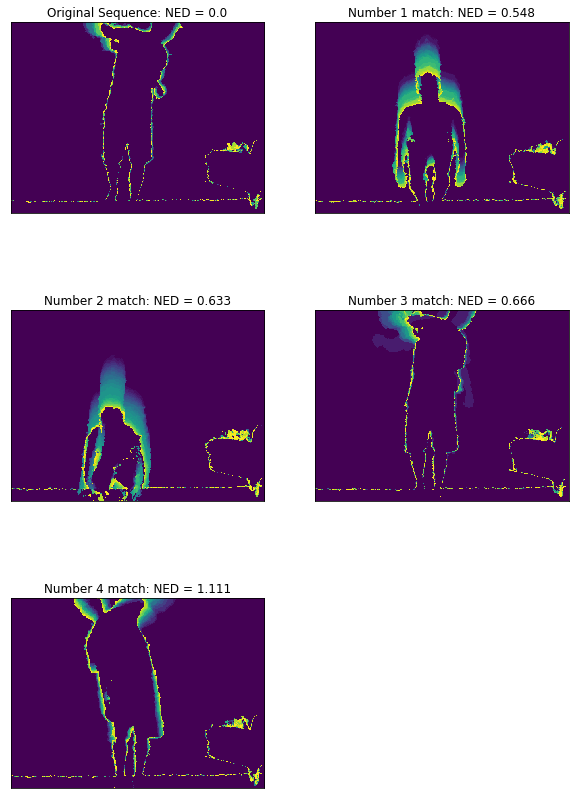

In [25]:
showNearestMHIs(x_test, test_idxs, x_train, y_train, train_idxs, mhis, 4)

array([[ 3.04699444e+03,  2.63573704e+06,  4.89020357e+05,
         1.31558456e+06,  1.04018135e+12,  2.08331090e+09,
        -1.37796421e+12,  1.00000000e+00,  1.00000000e+00],
       [ 4.89636920e+03,  5.90855491e+05,  9.64469374e+05,
         3.36743942e+05, -1.87682221e+11, -1.93916080e+07,
         7.30713820e+12,  1.80000000e+01,  5.00000000e+00],
       [ 1.79100606e+03,  1.05414885e+06,  9.96923708e+04,
         8.08396153e+03,  1.82156784e+08,  3.23862144e+06,
         2.49532889e+08,  1.10000000e+01,  3.00000000e+00],
       [ 2.54300500e+03,  1.90550897e+06,  3.90689675e+04,
         1.16393346e+05,  3.95735026e+08,  1.11805595e+08,
        -1.96461941e+11,  8.00000000e+00,  3.00000000e+00],
       [ 1.85041334e+03,  1.04597291e+06,  5.23149226e+03,
         2.37655478e+05, -4.32307139e+09,  2.43000537e+08,
        -1.42697771e+10,  9.00000000e+00,  3.00000000e+00],
       [ 2.88882179e+03,  2.17711861e+06,  1.87632425e+05,
         5.03770509e+05,  1.54875416e+11,  7.385658

In [24]:
names = ['Original Sequence'] + [f'Number {i} match' for i in range(1, 4+1)]

In [28]:
names[0] + f': Distance = {round(np.random.random(), 3)}'

'Original Sequence: Distance = 0.594'

In [42]:
d = norm_dists(x_train, train_idxs, x_test)

In [43]:
d

[(4.7736256112703535, array([3.])),
 (5.09279425301537, array([18.])),
 (6.205252538131371, array([1.])),
 (5.948387111912926, array([0.]))]

In [45]:
y_test

array([[3.]])

In [35]:
[d.pop() for _ in range(4)]

[1.8775228099211294, 2.540744680856449, 5.948387111912926, 4.7736256112703535]

In [ ]:
heapq.heappop

In [29]:
d.index(max(d))

11

In [23]:
max(d)

6.205252538131371

In [30]:
len(d)

19

In [31]:
t = []
for i in range(10):
    heapq.heappush(t, np.random.random())

In [32]:
t.index(max(t))

8

In [33]:
len(t)

10

In [34]:
t

[0.0028416806491337043,
 0.15559298412666356,
 0.30748401193466945,
 0.47499889678340024,
 0.90748786691633,
 0.33410274003026363,
 0.5157258740514157,
 0.826533584569128,
 0.9667258318103037,
 0.9351269825183388]

In [11]:
# min_dist = float('inf')
# label = 0

# for i, norm_train_moment in enumerate(norm_train_moments):
#     dist = np.sum(np.sqrt(np.power(norm_test_moments - norm_train_moment, 2)))
    
#     if dist < min_dist:
#         min_dist = dist
#         label_idx = i
# min_dist, train_labels[label_idx], test_label

In [17]:
y_test

array([[3.]])

In [31]:
#dists = scipy_dists(x_train, x_test)
dists = norm_dists(x_train, x_test)
dists

array([2.52505673, 1.95822257, 0.6999243 , 0.33716356, 0.79188752,
       3.19649095, 2.14773901, 0.91533866, 0.87825447, 6.03689867,
       1.33881302, 6.47395565, 4.93419627, 0.31420399, 4.94551808,
       1.22404663, 2.24647877, 2.09128314, 1.98330025])

In [32]:
np.sort(dists)

array([0.31420399, 0.33716356, 0.6999243 , 0.79188752, 0.87825447,
       0.91533866, 1.22404663, 1.33881302, 1.95822257, 1.98330025,
       2.09128314, 2.14773901, 2.24647877, 2.52505673, 3.19649095,
       4.93419627, 4.94551808, 6.03689867, 6.47395565])

In [33]:
np.array(y_train)[np.argsort(dists)].reshape(1, -1)

array([[2., 2., 3., 4., 4., 3., 3., 4., 2., 4., 5., 5., 1., 2., 5., 5.,
        1., 1., 1.]])

In [34]:
y_hat_idx = np.array(train_idxs)[np.argsort(dists)].reshape(1, -1)[0][0]
np.array(train_idxs)[np.argsort(dists)].reshape(1, -1)[0]

array([ 4.,  6.,  8., 12., 13., 11.,  9., 14.,  7., 15., 16., 17.,  2.,
        5., 19., 18.,  3.,  0.,  1.])

In [35]:
y_hat = np.array(y_train)[np.argsort(dists)][0]
y_test, y_hat

(array([[3.]]), array([2.]))

In [36]:
test_idxs, y_hat_idx

(array([[10.]]), 4.0)

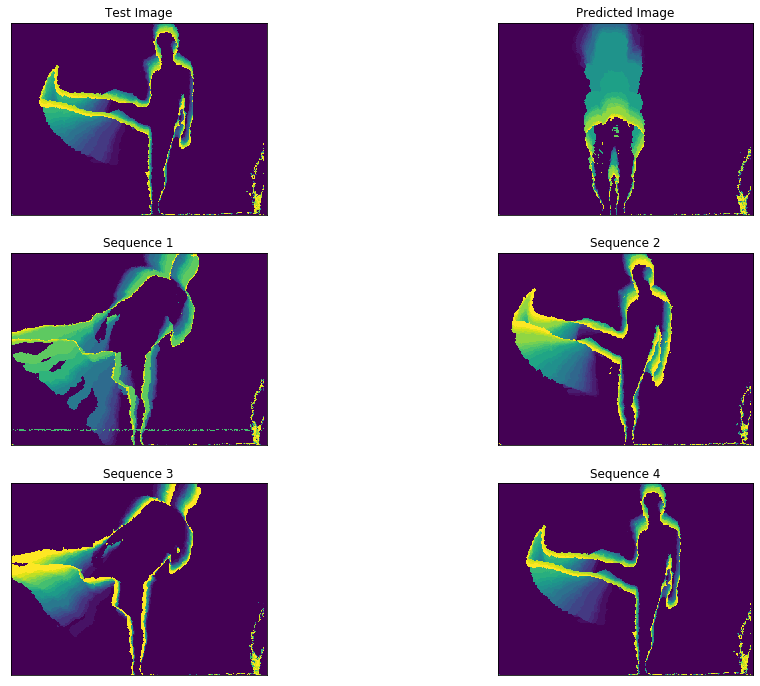

In [40]:
start = int((y_test[0][0] - 1) * 4)
end = int(start + 4)
sequence = list(range(start, end))

fig = plt.figure(figsize=(16, 12))

ax1 = fig.add_subplot(321, title='Test Image', xticks=[], yticks=[])
plt.subplot(ax1)
ax1.imshow(mhis[:, :, int(test_idxs[0][0])])

ax2 = fig.add_subplot(322, title='Predicted Image', xticks=[], yticks=[])
plt.subplot(ax2)
ax2.imshow(mhis[:, :, int(y_hat_idx)])

ax3 = fig.add_subplot(323, title='Sequence 1', xticks=[], yticks=[])
plt.subplot(ax3)
ax3.imshow(mhis[:, :, int(sequence[0])])

ax4 = fig.add_subplot(324, title='Sequence 2', xticks=[], yticks=[])
plt.subplot(ax4)
ax4.imshow(mhis[:, :, int(sequence[1])])

ax5 = fig.add_subplot(325, title='Sequence 3', xticks=[], yticks=[])
plt.subplot(ax5)
ax5.imshow(mhis[:, :, int(sequence[2])])

ax6 = fig.add_subplot(326, title='Sequence 4', xticks=[], yticks=[])
plt.subplot(ax6)
ax6.imshow(mhis[:, :, int(sequence[3])])

# ax2 = fig.add_subplot(222, title='Predicted Image', xticks=[], yticks=[])
# plt.subplot(ax2)
# ax2.imshow(im, extent=[0, im.shape[1], 0, im.shape[0]])
# ax2.plot(vs[::-1], range(len(vs)), '-', linewidth=1, color='firebrick')

# ax3 = fig.add_subplot(223, title='Horizontal Seam', xticks=[], yticks=[])
# plt.subplot(ax3)
# ax3.imshow(im, extent=[0, im.shape[1], 0, im.shape[0]])
# ax3.plot(range(len(hs)), im.shape[0]-hs, '-', linewidth=1, color='firebrick')

# ax4 = fig.add_subplot(224, title='Both Seams', xticks=[], yticks=[])
# plt.subplot(ax4)
# ax4.imshow(im, extent=[0, im.shape[1], 0, im.shape[0]])
# ax4.plot(vs[::-1], range(len(vs)), '-', linewidth=1, color='firebrick')
# ax4.plot(range(len(hs)), im.shape[0]-hs, '-', linewidth=1, color='firebrick')

In [190]:
sequence[0], sequence[1], sequence[2], sequence[3], test_idxs[0][0]

(0, 1, 2, 3, 11.0)

In [120]:
y_test, test_idxs

(array([[1.]]), array([[1.]]))

0.0

In [116]:
sequence

[3, 4, 5, 6]

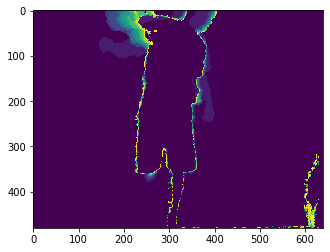

In [31]:
plt.imshow(mhis[:, :, sequence[0]])

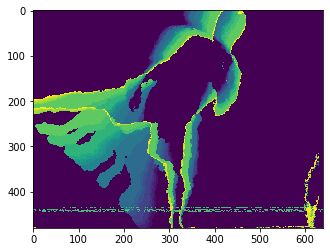

In [32]:
plt.imshow(mhis[:, :, sequence[1]])

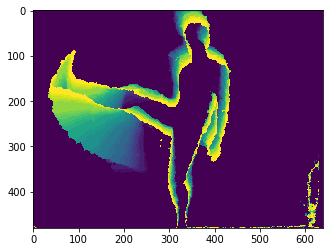

In [33]:
plt.imshow(mhis[:, :, sequence[2]])

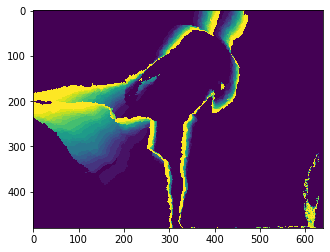

In [34]:
plt.imshow(mhis[:, :, sequence[3]])

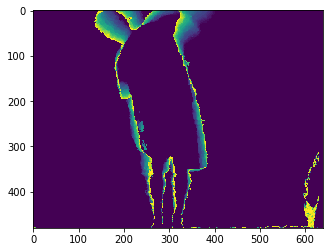

In [192]:
for i in range(start, end):
    plt.imshow(mhis[:, :, i])

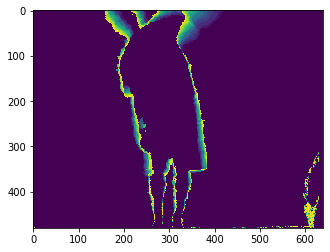

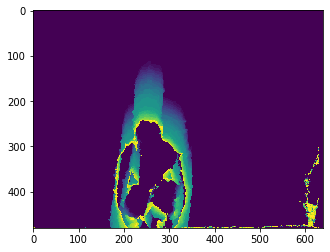

In [119]:
plt.imshow(mhis[:, :, 4])

array([2, 1, 5, 5, 5, 2, 5, 1, 1, 2, 3, 3, 4, 4, 2, 3, 4, 4, 1])

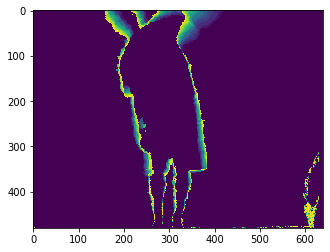

In [110]:
plt.imshow(mhis[:, :, idx])

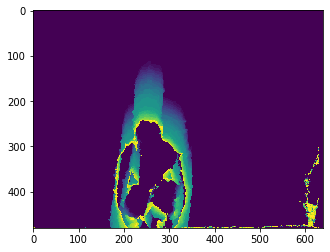

In [111]:
plt.imshow(mhis[:, :, label_idx])

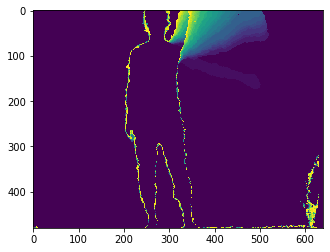

In [112]:
plt.imshow(mhis[:, :, 8])

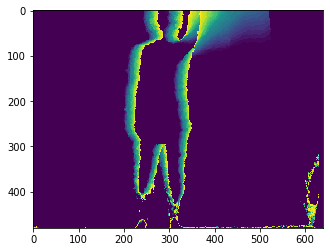

In [113]:
plt.imshow(mhis[:, :, 9])

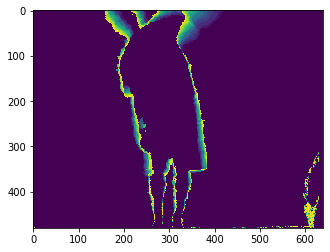

In [114]:
plt.imshow(mhis[:, :, 10])

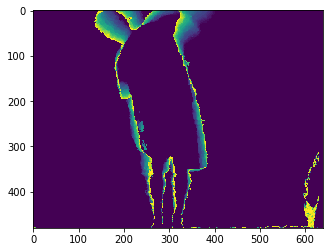

In [115]:
plt.imshow(mhis[:, :, 11])

In [70]:
train_moments.shape

(19, 7)

In [ ]:
hu_moments[:idx]

In [6]:
im_moment_00 = image_moment(mhi, 0, 0)
im_moment_10 = image_moment(mhi, 1, 0)
im_moment_01 = image_moment(mhi, 0, 1)

x_bar = im_moment_10 / im_moment_00
y_bar = im_moment_01 / im_moment_00

moments = np.zeros(7)

In [24]:
np.save?

In [22]:
save_dir = ''

In [23]:
os.path.join(save_dir, 'hu_moments.py')

'hu_moments.py'

In [13]:
moments

array([2.60841705e+07, 6.74602903e+14, 4.31657888e+17, 4.08706614e+17,
       1.71666261e+35, 1.05280766e+25, 6.80605868e+39])

In [7]:
i = 1

In [10]:
f = 

In [11]:
f(mhi, x_bar, y_bar)

26084170.487695027

(480, 640, 20)

In [52]:
sequence_dir

'PS5_Data/rightkick/rightkick-p1-1'

In [53]:
depth_files = glob.glob(os.path.join(directoryName, '*.pgm'))
depth_files = np.sort(depth_files)

depth_ims = []
for depth_file in depth_files:
    depth_im = imread(depth_file)
    depth_ims.append(depth_im)

foreground_ims = []
for depth_im in depth_ims:
    foreground_im = depth_im.copy()
    foreground_im[foreground_im > threshold] = 0
    foreground_ims.append(foreground_im)

difference_ims = []
for i in range(1, len(foreground_ims)):
    foreground_im1 = foreground_ims[i-1].copy()
    foreground_im2 = foreground_ims[i].copy()
    foreground_im1[foreground_im1>0] = 1
    foreground_im2[foreground_im2>0] = 1
    difference_im = foreground_im2 - foreground_im1
    difference_im[difference_im != 0] = 1
    difference_ims.append(difference_im)

In [77]:
mhi = np.zeros(difference_ims[0].shape)

for i, difference_im in enumerate(difference_ims):
    mhi[difference_im == 1] = i + 1
    mhi[difference_im == 0] -= 1
    
mhi[mhi < 0] = 0
mhi /= np.max(mhi)

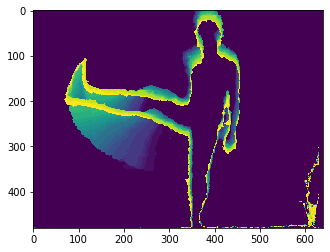

In [78]:
plt.imshow(mhi)

In [68]:
i = 1

In [121]:
mhis = []

for action in actions:
    
    subdir_name = os.path.join(base_dir, action)
    subdir_files = os.listdir(subdir_name)
    
    for sequence in subdir_files:
        
        sequence_dir = os.path.join(subdir_name, sequence)     
        mhis.append(computeMHI(sequence_dir, 39000))

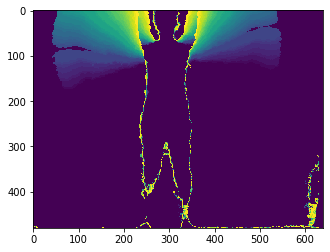

In [122]:
plt.imshow(mhis[0])

In [124]:
np.array(mhis).shape

(20, 480, 640)

In [127]:
t1 = mhis[0].reshape(480, 640, 1)

In [129]:
t2 = mhis[1].reshape(480, 640, 1)

In [132]:
t3 = np.concatenate([t1, t2], axis=2)

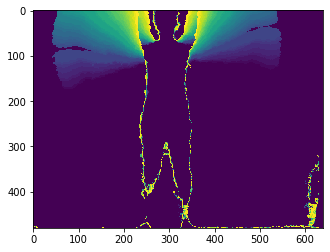

In [134]:
plt.imshow(t3[:, :, 0])

In [45]:
mhis[1][50, 100]

0.09523809523809523

In [50]:
mhis[1][450:, 600:620]

array([[0.        , 0.        , 0.14285714, 0.23809524, 0.42857143,
        0.42857143, 0.61904762, 0.52380952, 0.52380952, 0.71428571,
        0.71428571, 0.61904762, 0.52380952, 0.61904762, 0.61904762,
        0.85714286, 0.57142857, 0.47619048, 0.47619048, 0.71428571],
       [0.        , 0.0952381 , 0.14285714, 0.33333333, 0.52380952,
        0.42857143, 0.71428571, 0.9047619 , 0.80952381, 0.71428571,
        0.61904762, 0.57142857, 0.52380952, 0.71428571, 0.71428571,
        0.76190476, 0.66666667, 0.76190476, 0.76190476, 0.9047619 ],
       [0.        , 0.14285714, 0.33333333, 0.42857143, 0.61904762,
        0.71428571, 0.80952381, 1.        , 0.52380952, 0.61904762,
        0.42857143, 0.66666667, 0.80952381, 0.71428571, 0.71428571,
        0.66666667, 0.57142857, 0.80952381, 0.71428571, 0.71428571],
       [0.        , 0.14285714, 0.33333333, 0.52380952, 0.52380952,
        0.66666667, 0.57142857, 0.76190476, 0.61904762, 0.71428571,
        0.80952381, 0.76190476, 0.71428571, 0

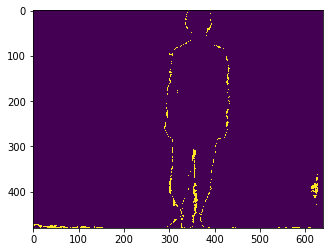

In [26]:
plt.imshow(difference_ims[0])

In [76]:
def read_pgm_data(base_dir, actions, show=False):
    
    depth_ims = {}
    
    for action in actions:
        
        depth_ims[action] = {}

        subdir_name = os.path.join(base_dir, action)
        subdir_files = os.listdir(subdir_name)

        for sequence in subdir_files:
            # cycle through all sequences for this action category
            depth_ims[action][sequence] = []
            depth_files = glob.glob(os.path.join(subdir_name, sequence, '*.pgm'))
            depth_files = numpy.sort(depth_files)
            
            for depth_file in depth_files:
                depth_im = imread(depth_file)
                depth_ims[action][sequence].append(depth_im)
                
                if show:
                    plt.imshow(depth_im)
                    plt.show()
                    
    return depth_ims

In [78]:
depth_ims = read_pgm_data(base_dir, actions)

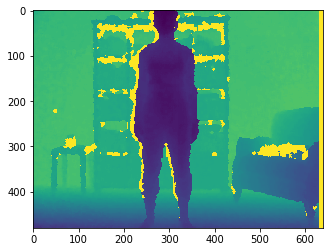

In [51]:
plt.imshow(depth_ims['botharms'][0])

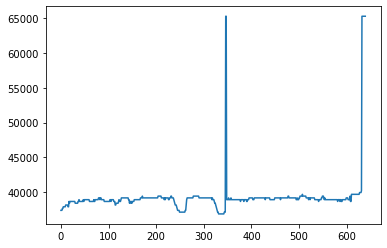

In [53]:
plt.plot(depth_ims['crouch'][0][-1])

In [81]:
foreground_ims = depth_ims.copy()

In [84]:
for sequences in foreground_ims.values():
    for ims in sequences.values():
        for im in ims:
            im[im > threshold] = 0

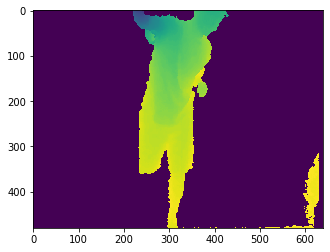

In [87]:
plt.imshow(foreground_ims['punch']['punch-p2-2'][14])

In [136]:
difference_ims = {action: {sequence: [] for sequence in foreground_ims[action].keys()} for action in foreground_ims.keys()}
for action in foreground_ims.keys():
    for sequence in foreground_ims[action].keys():
        #for ims in foreground_ims[action][sequence]:
        ims = foreground_ims[action][sequence]
        for i in range(1, len(ims)):
            temp1 = ims[i].copy()
            temp2 = ims[i-1].copy()
            temp1[temp1>0] = 1
            temp2[temp2>0] = 1
            difference_im = temp1 - temp2
            difference_im[difference_im != 0] = 1
            difference_ims[action][sequence].append(difference_im)

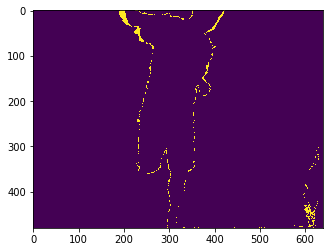

In [139]:
plt.imshow(difference_ims['punch']['punch-p2-2'][10])

In [141]:
ims = difference_ims['punch']['punch-p2-2']

In [144]:
mhi = np.zeros(ims[0].shape)

In [145]:
for im in ims:
    mhi += im

In [149]:
mhi /= np.max(mhi)

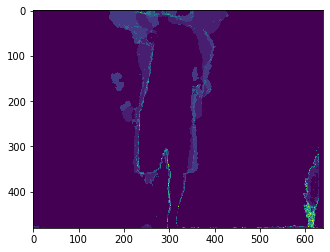

In [150]:
plt.imshow(mhi)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.66666667, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.66666667, 0.66666667, 0.04166667, ..., 0.        , 0.        ,
        0.        ],
       [0.91666667, 0.91666667, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

In [183]:
hu_mom = hu_moments(mhi)

In [184]:
hu_mom

array([ 2.21168230e+08,  1.82934024e+16,  7.52227178e+20,  5.48956503e+20,
        3.31435331e+41,  6.86550045e+28, -7.76523701e+50])

In [172]:
np.zeros(7)

array([0., 0., 0., 0., 0., 0., 0.])

In [185]:
mhi.shape

(480, 640)

In [188]:
arr = np.array([[x**0 * y**0 for x in range(640)] for y in range(480)])

In [194]:
np.sum(arr * mhi)

4787.5

In [163]:
central_moment(mhi, 2, 0, x_bar, y_bar) + central_moment(mhi, 0, 2, x_bar, y_bar)

221168229.61616904

In [157]:
image_moment(mhi, 0, 0)

4787.500000000087

In [133]:
diff = temp1-temp2

In [134]:
diff[diff!=0] = 1

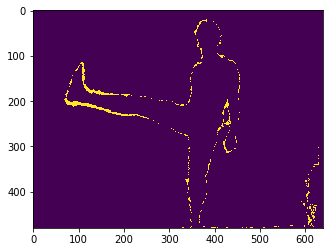

In [135]:
plt.imshow(diff)

In [120]:
foreground_ims

[Array([[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [38659, 38659, 38659, ...,     0,     0,     0],
        [38403, 38403, 38403, ...,     0,     0,     0],
        [38403, 38403, 38403, ...,     0,     0,     0]], dtype=int32),
 Array([[    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        [    0,     0,     0, ...,     0,     0,     0],
        ...,
        [38403, 38659, 38659, ...,     0,     0,     0],
        [38147, 38147, 38147, ...,     0,     0,     0],
        [38403, 37891, 38147, ...,     0,     0,     0]], dtype=int32),
 Array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32),
 Array([[    0,     0,     0, ...,

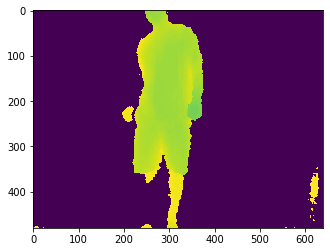

In [125]:
plt.imshow(foreground_ims['punch']['punch-p2-2'][0])

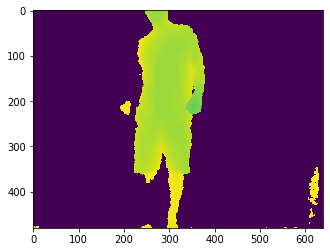

In [126]:
plt.imshow(foreground_ims['punch']['punch-p2-2'][1])

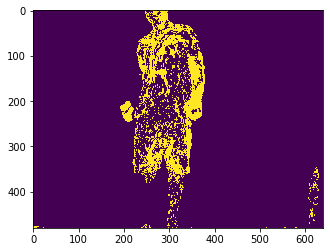

In [127]:
plt.imshow(difference_ims['punch']['punch-p2-2'][0])

In [85]:
foreground_ims['punch'].keys()

dict_keys(['punch-p2-2', 'punch-p1-1', 'punch-p1-2', 'punch-p2-1'])

In [ ]:
depth_ims['crouch'][0][depth_ims['crouch'][0] > 39000] = 0

In [63]:
depth_ims['botharms']

[Array([[52483, 52739, 52483, ..., 65287, 65287, 65287],
        [52483, 52483, 52483, ..., 65287, 65287, 65287],
        [52483, 52483, 52483, ..., 65287, 65287, 65287],
        ...,
        [37635, 37635, 37635, ..., 65287, 65287, 65287],
        [37379, 37379, 37379, ..., 65287, 65287, 65287],
        [37379, 37379, 37379, ..., 65287, 65287, 65287]], dtype=int32),
 Array([[53763, 53763, 53763, ..., 65287, 65287, 65287],
        [53763, 53763, 53763, ..., 65287, 65287, 65287],
        [53763, 54019, 53763, ..., 65287, 65287, 65287],
        ...,
        [38147, 38147, 38147, ..., 65287, 65287, 65287],
        [37891, 37891, 37891, ..., 65287, 65287, 65287],
        [37891, 37635, 37635, ..., 65287, 65287, 65287]], dtype=int32),
 Array([[54275, 54275, 54275, ..., 65287, 65287, 65287],
        [54019, 54275, 54275, ..., 65287, 65287, 65287],
        [54019, 54019, 54275, ..., 65287, 65287, 65287],
        ...,
        [39427, 39171, 39427, ..., 65287, 65287, 65287],
        [38659, 386

In [62]:
foreground_ims = {}
for key, values in depth_ims.items():
    

dict_values([[Array([[52483, 52739, 52483, ..., 65287, 65287, 65287],
       [52483, 52483, 52483, ..., 65287, 65287, 65287],
       [52483, 52483, 52483, ..., 65287, 65287, 65287],
       ...,
       [37635, 37635, 37635, ..., 65287, 65287, 65287],
       [37379, 37379, 37379, ..., 65287, 65287, 65287],
       [37379, 37379, 37379, ..., 65287, 65287, 65287]], dtype=int32), Array([[53763, 53763, 53763, ..., 65287, 65287, 65287],
       [53763, 53763, 53763, ..., 65287, 65287, 65287],
       [53763, 54019, 53763, ..., 65287, 65287, 65287],
       ...,
       [38147, 38147, 38147, ..., 65287, 65287, 65287],
       [37891, 37891, 37891, ..., 65287, 65287, 65287],
       [37891, 37635, 37635, ..., 65287, 65287, 65287]], dtype=int32), Array([[54275, 54275, 54275, ..., 65287, 65287, 65287],
       [54019, 54275, 54275, ..., 65287, 65287, 65287],
       [54019, 54019, 54275, ..., 65287, 65287, 65287],
       ...,
       [39427, 39171, 39427, ..., 65287, 65287, 65287],
       [38659, 38659, 38

In [26]:
depth_ims['botharms'][1] - depth_ims['botharms'][0]

Array([[1280, 1024, 1280, ...,    0,    0,    0],
       [1280, 1280, 1280, ...,    0,    0,    0],
       [1280, 1536, 1280, ...,    0,    0,    0],
       ...,
       [ 512,  512,  512, ...,    0,    0,    0],
       [ 512,  512,  512, ...,    0,    0,    0],
       [ 512,  256,  256, ...,    0,    0,    0]], dtype=int32)

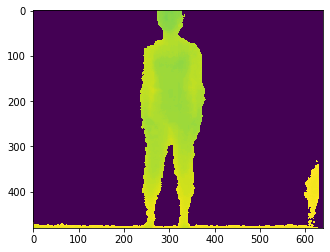

In [49]:
plt.imshow(depth_ims['crouch'][0])

In [36]:
depth_ims['botharms'][0][200, 300]

34307

In [38]:
depth_ims['crouch'][0][200, 300]

34051

In [54]:
depth_ims['crouch'][0][-1]

Array([37379, 37379, 37379, 37635, 37635, 37891, 37891, 37891, 37891,
       37891, 38147, 38147, 38147, 38147, 38147, 37891, 37891, 38659,
       38403, 38659, 38659, 38659, 38659, 38659, 38659, 38659, 38659,
       38659, 38659, 38659, 38403, 38403, 38403, 38403, 38403, 38403,
       38659, 38659, 38915, 38659, 38659, 38659, 38659, 38659, 38659,
       38659, 38659, 38915, 38659, 38915, 38915, 38915, 38915, 38915,
       38915, 38915, 38915, 38915, 38915, 38915, 38659, 38659, 38659,
       38659, 38659, 38659, 38659, 38659, 38659, 38915, 38659, 38659,
       38915, 38915, 38915, 38915, 38915, 38915, 38915, 39171, 39171,
       39171, 38915, 39171, 39171, 38915, 38915, 38915, 38915, 38915,
       38915, 38659, 38659, 38659, 38659, 38659, 38659, 38659, 38659,
       38659, 38659, 38659, 38659, 38915, 38915, 38659, 38915, 38915,
       38915, 38915, 38915, 38659, 38659, 38659, 38147, 38147, 38403,
       38403, 38403, 38403, 38403, 38659, 38915, 38659, 38659, 38659,
       38915, 39171,

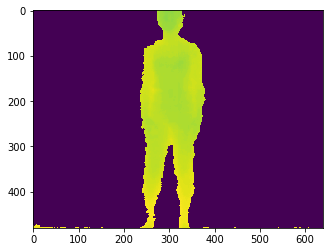

In [59]:
plt.imshow(depth_ims['crouch'][0])

In [6]:
subdir_files = os.listdir(subdirname)

In [9]:
glob.glob()

[]

['PS5_Data/botharms/botharms-up-p1-1/d-1303672803.953497-4180169794.pgm',
 'PS5_Data/botharms/botharms-up-p1-1/d-1303672804.754857-4228221514.pgm',
 'PS5_Data/botharms/botharms-up-p1-1/d-1303672806.296720-25353348.pgm',
 'PS5_Data/botharms/botharms-up-p1-1/d-1303672805.055549-4246240909.pgm',
 'PS5_Data/botharms/botharms-up-p1-1/d-1303672806.259887-23351193.pgm',
 'PS5_Data/botharms/botharms-up-p1-1/d-1303672803.721667-4166154709.pgm',
 'PS5_Data/botharms/botharms-up-p1-1/d-1303672804.186854-4194184879.pgm',
 'PS5_Data/botharms/botharms-up-p1-1/d-1303672803.853332-4174163329.pgm',
 'PS5_Data/botharms/botharms-up-p1-1/d-1303672806.096676-13340418.pgm',
 'PS5_Data/botharms/botharms-up-p1-1/d-1303672805.698379-4284281854.pgm',
 'PS5_Data/botharms/botharms-up-p1-1/d-1303672803.553490-4156143934.pgm',
 'PS5_Data/botharms/botharms-up-p1-1/d-1303672806.831311-57387828.pgm',
 'PS5_Data/botharms/botharms-up-p1-1/d-1303672806.726957-51381363.pgm',
 'PS5_Data/botharms/botharms-up-p1-1/d-130367280